## Name / Mahmoud Khorshed
#### copyrights 2022

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns # statistical data visualization
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy.polynomial import polynomial as Poly   #poly.fit
from mlxtend.evaluate import bias_variance_decomp
from sklearn import metrics



# Task 1

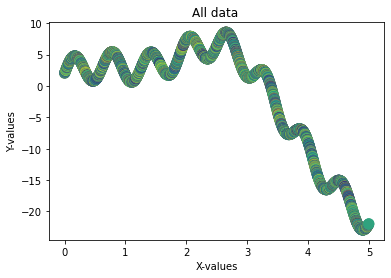

In [2]:
data=pd.read_pickle('data.pkl')
data = pd.DataFrame(data,columns = ['X','y'])

#plot Scatter
colors = np.random.rand(len(data))
plt.scatter(data['X'],data['y'] , s=100, c=colors, alpha=0.5);
plt.title("All data ")
plt.xlabel("X-values")
plt.ylabel("Y-values")
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.X, data.y, test_size=.1,shuffle=True,random_state=50)  

print('Train set X',X_train.shape), print('Train set y ',y_train.shape)
print('Test set X ',X_test.shape), print('Test set y',y_test.shape)
print("The sum of Train  and Test ",X_train.shape[0]+X_test.shape[0]) 

Train set X (4500,)
Train set y  (4500,)
Test set X  (500,)
Test set y (500,)
The sum of Train  and Test  5000


In [4]:
## resample X,y
X_train_new=X_train.to_numpy()
X_train_new=X_train_new[:,np.newaxis]

###########

y_train_new=y_train.to_numpy()



###########
X_test_new=X_test.to_numpy()
X_test_new=X_test_new[:,np.newaxis]

###########
y_test_new=y_test.to_numpy()


X_train_new.shape,y_train_new.shape,X_test_new.shape,y_test_new.shape  ##((4500, 1), (4500, ), (500, 1), (500, 1))

((4500, 1), (4500,), (500, 1), (500,))

## We want to divide Train set into 10 subsets equal Randomly

In [5]:
# For X
N= 10   #number of equal parts
Part_Size = int(np.divide(len(X_train_new),N))
XTrain_set= list()

for i in range(0,len(X_train_new),Part_Size):
    XTrain_set.append(X_train_new[i:i+Part_Size])

XTrain_set[0] ; #print 1'st xTrain set


In [6]:
    ## To check
len(XTrain_set[0]),len(XTrain_set[3]),len(XTrain_set[9]);  # (450, 450, 450)

In [7]:
# For y
len(y_train_new)
N= 10   #number of equal parts
Part_Size = int(np.divide(len(y_train_new),N))
yTrain_set= list()

for i in range(0,len(y_train_new),Part_Size):
    yTrain_set.append(y_train_new[i:i+Part_Size])

yTrain_set[0] ;  #print 1'st yTrain set

## Plot each of the training dataset separately

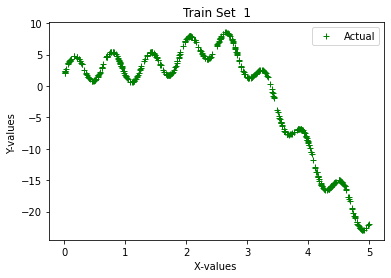

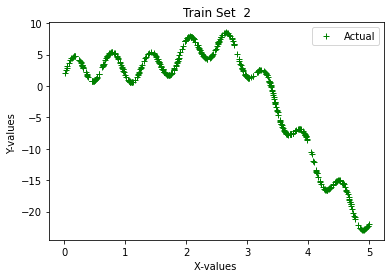

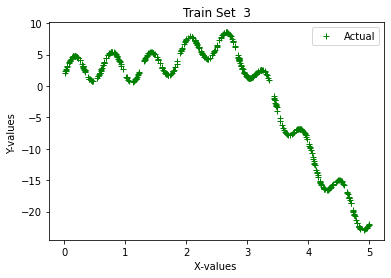

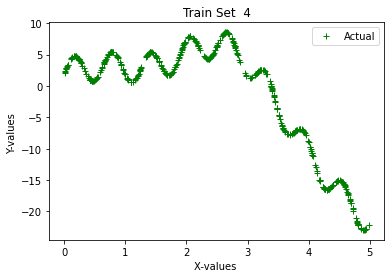

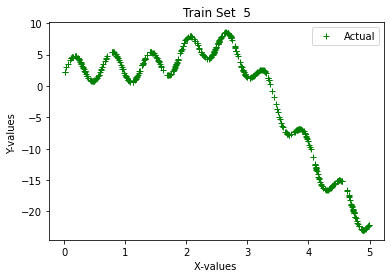

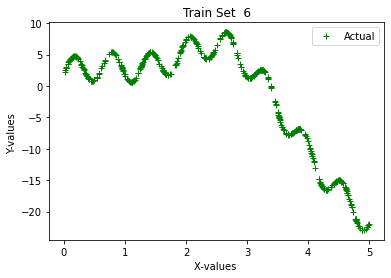

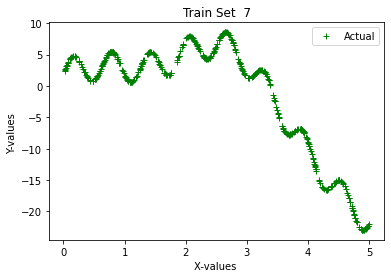

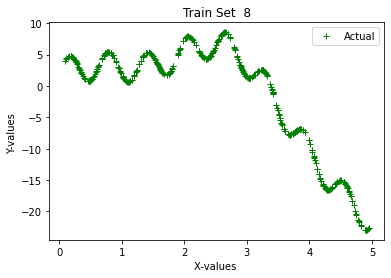

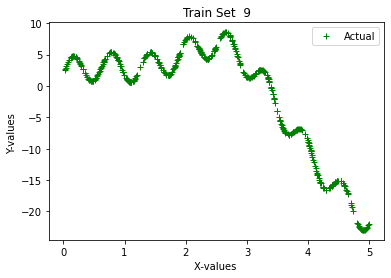

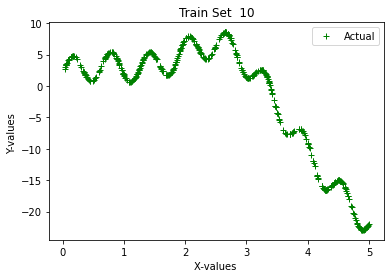

In [8]:
for i in range(1,11):
    plt.plot( XTrain_set[i-1], yTrain_set[i-1],'+',color='g',label='Actual')
    plt.title('Train Set  %d' % i  )
    plt.xlabel('X-values ')
    plt.ylabel('Y-values ')
    plt.legend()
    plt.show()


## Now i have 10 train set equally and 1 test set
## Make function Degree with plot 


In [9]:
y_test_new.shape

(500,)

In [10]:
def Model_Degree(Degree):
    poly=PolynomialFeatures(degree=Degree)
    X_test_poly=poly.fit_transform(X_test_new)
    bias_=list()
    var_=list()
    mse_=list()
    Y_test_pred=list()              # Predicting 10 models using 10 model 

    # we iterate 10 models for specified degree 
    Model=list()
    for j in range (10):        #loop 2
        Model.append(LinearRegression().fit(poly.fit_transform(XTrain_set[j]),yTrain_set[j]))
        Y_test_pred.append(Model[j].predict(X_test_poly))
        # get bias and variance
        mse, bias, var = bias_variance_decomp(Model[j], poly.fit_transform(XTrain_set[j]) ,yTrain_set[j]
                                              ,X_test_poly, y_test_new, loss='mse',
                                              num_rounds=200, random_seed=123)
        bias_.append(bias)
        var_.append(var)
        mse_.append(mse)
    for i in range(1,11):
        plt.plot(X_test_new, Y_test_pred[i-1] ,'o',color='r',label='Predicted')
        plt.plot(X_test_new, y_test_new ,'+',color='g',label='Actual')
        plt.title( 'Degree  %d ' % Degree + ' Model  %d  ' % i)
        plt.xlabel('X-values ')
        plt.ylabel('Y-values ')
        plt.legend()
        plt.show()
    return(bias_,var_,mse_)

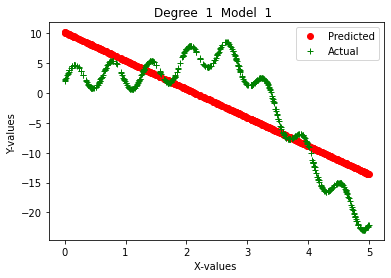

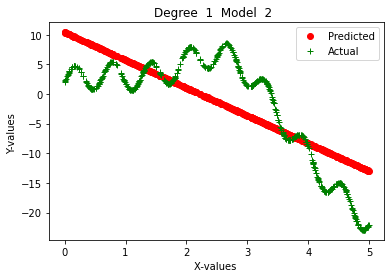

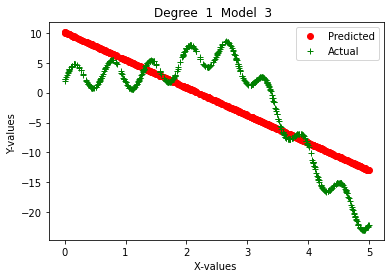

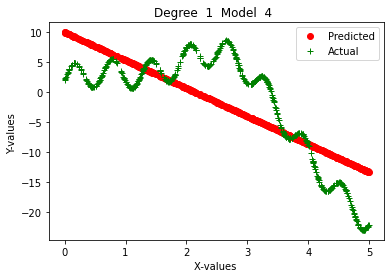

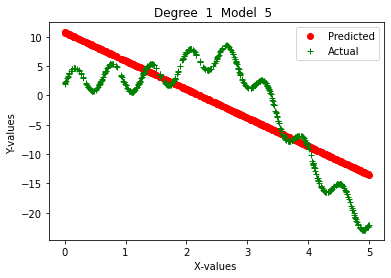

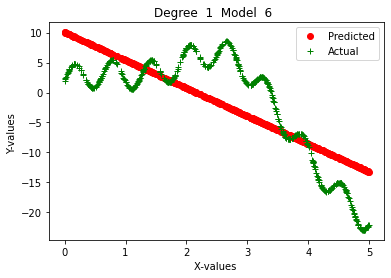

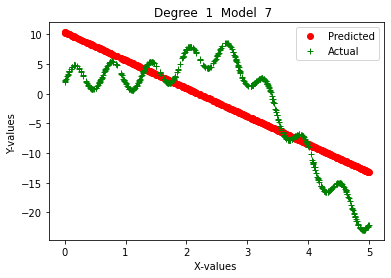

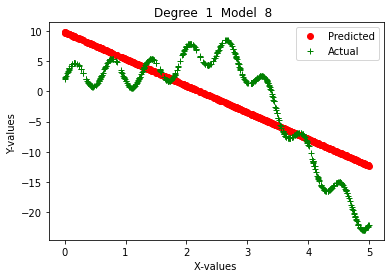

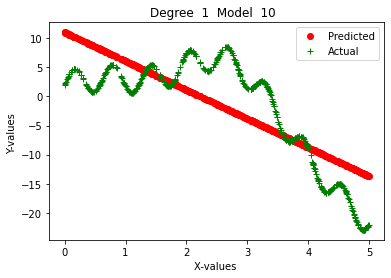

Avg_Bias Degree 1   = 31.751675866625327
Avg_var Degree 1  = 0.14866990809401534
Avg_mse Degree 1   = 31.900345774719348


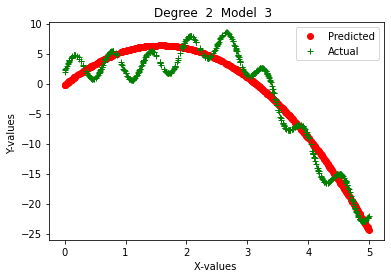

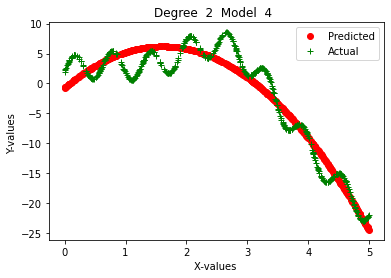

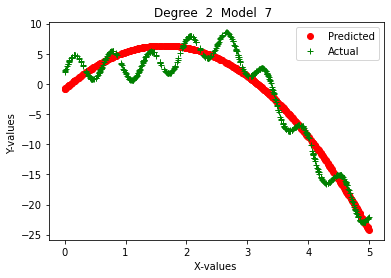

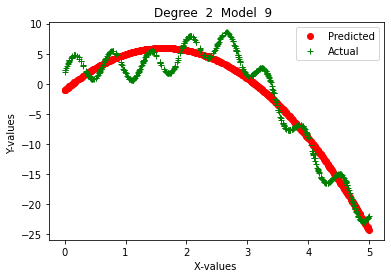

Avg_Bias Degree 2   = 6.034738793871623
Avg_var Degree 2  = 0.041014755934911606
Avg_mse Degree 2   = 6.075753549806534


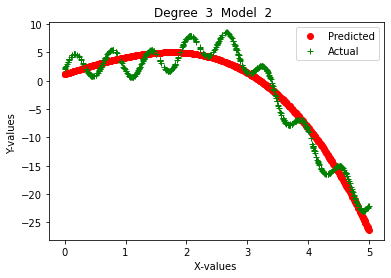

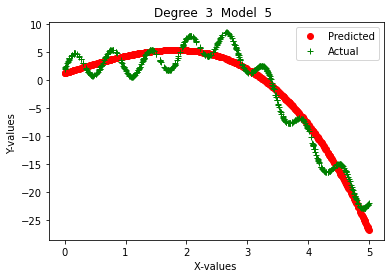

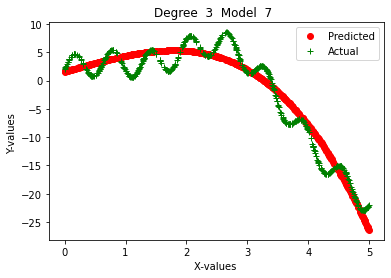

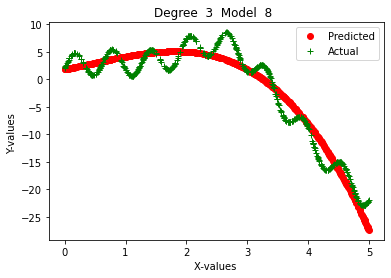

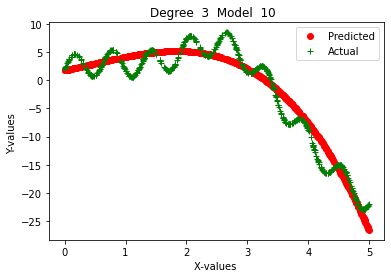

Avg_Bias Degree 3   = 5.322868899944348
Avg_var Degree 3  = 0.0488066332963188
Avg_mse Degree 3   = 5.371675533240667


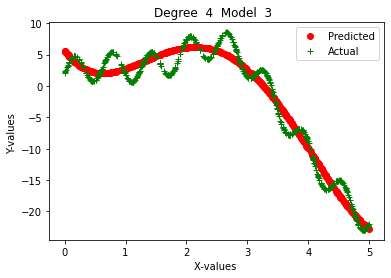

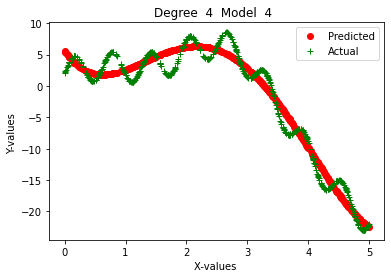

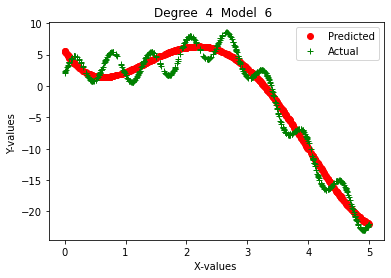

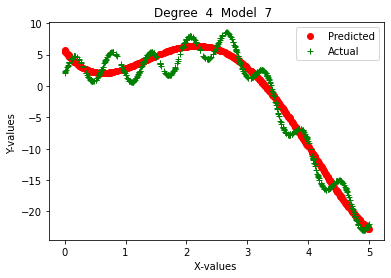

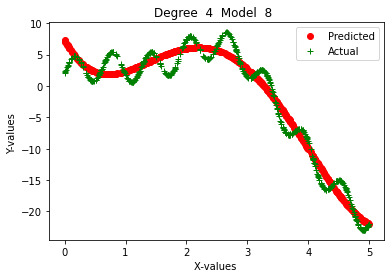

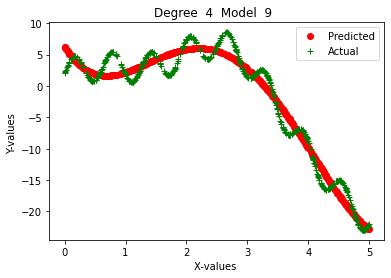

Avg_Bias Degree 4   = 3.181483224235673
Avg_var Degree 4  = 0.03283505933792262
Avg_mse Degree 4   = 3.2143182835735957


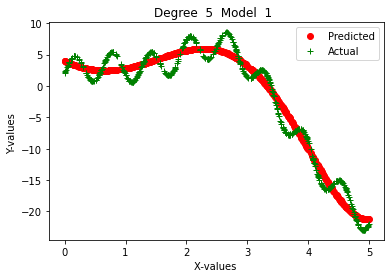

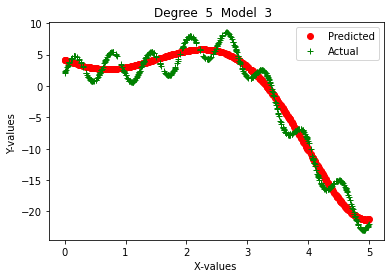

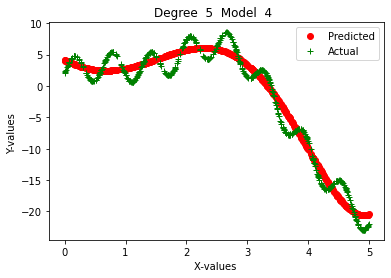

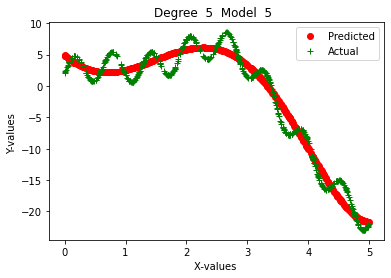

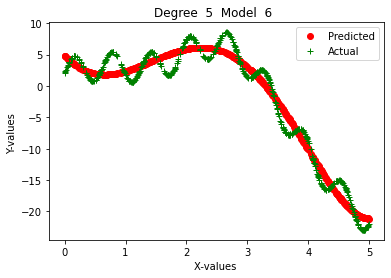

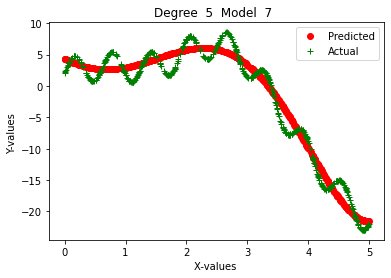

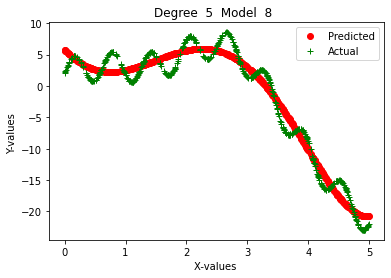

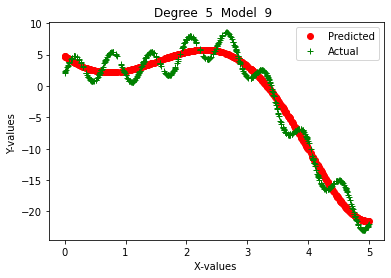

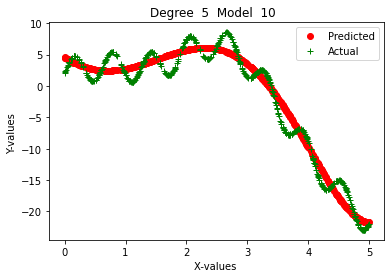

Avg_Bias Degree 5   = 3.078721954241316
Avg_var Degree 5  = 0.04099843804470085
Avg_mse Degree 5   = 3.119720392286017


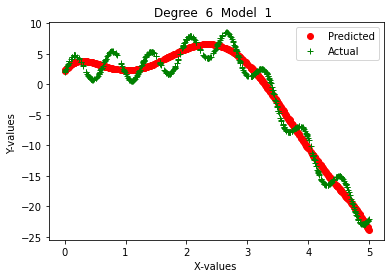

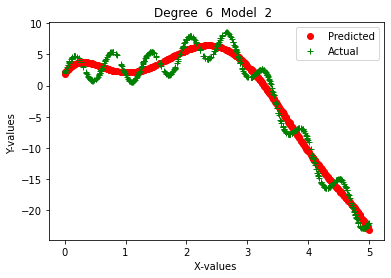

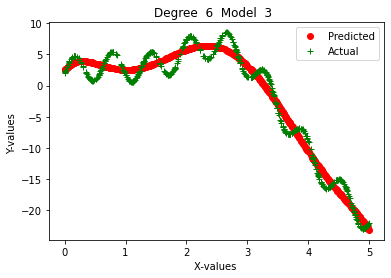

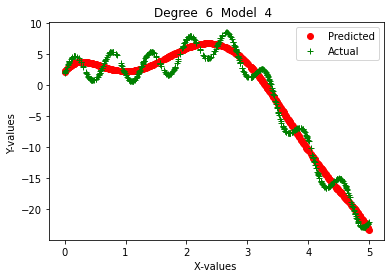

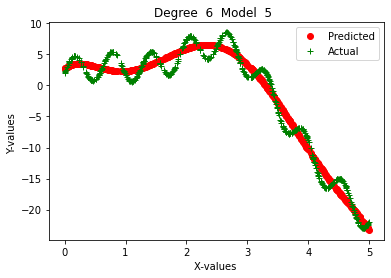

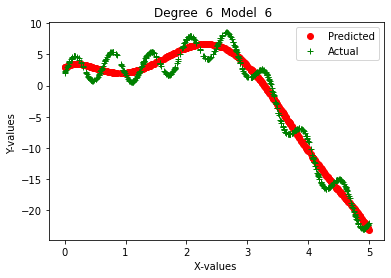

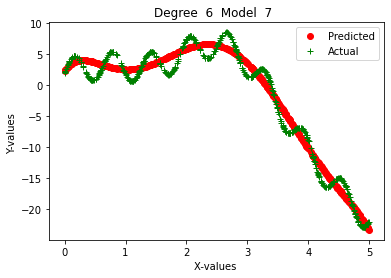

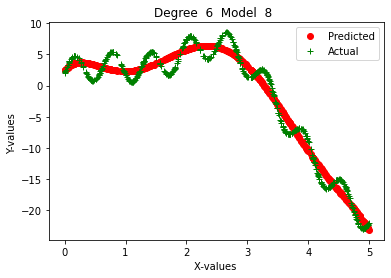

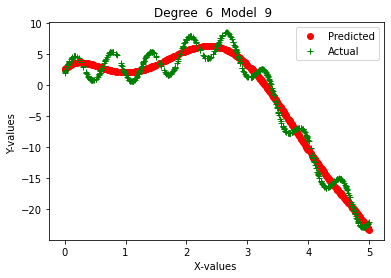

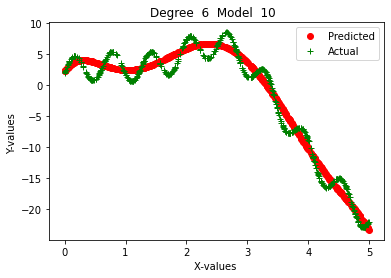

Avg_Bias Degree 6   = 2.6612519007946553
Avg_var Degree 6  = 0.038908396209798586
Avg_mse Degree 6   = 2.7001602970044543


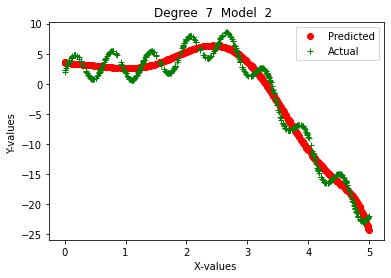

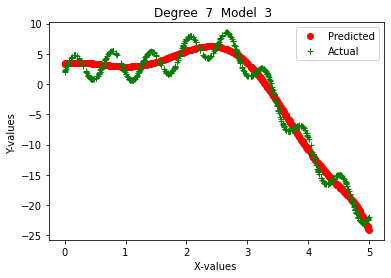

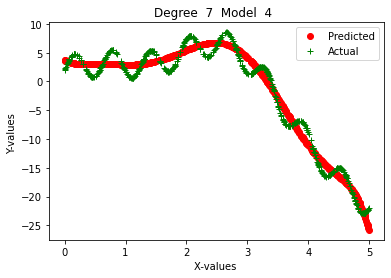

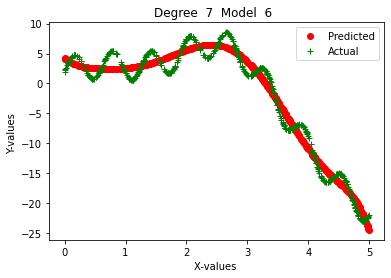

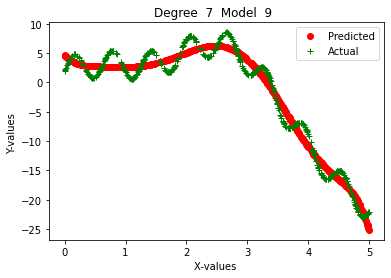

Avg_Bias Degree 7   = 2.5658239651482537
Avg_var Degree 7  = 0.048544237405899526
Avg_mse Degree 7   = 2.6143682025541537


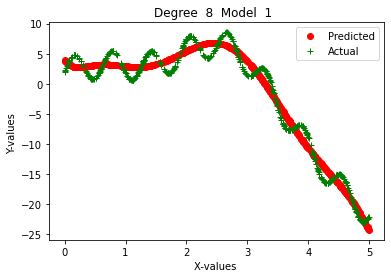

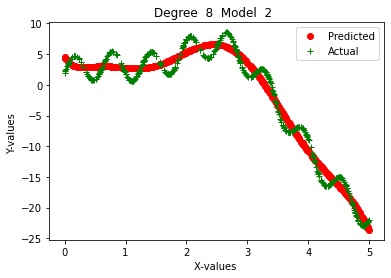

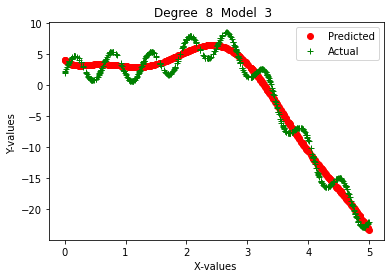

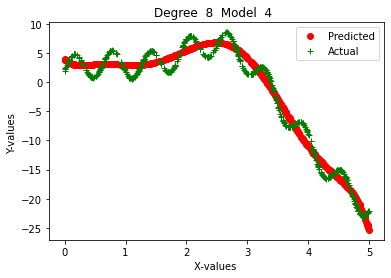

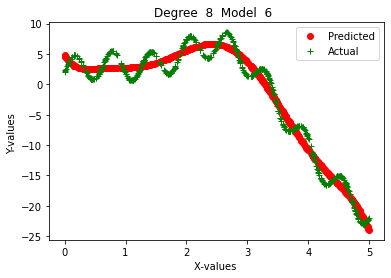

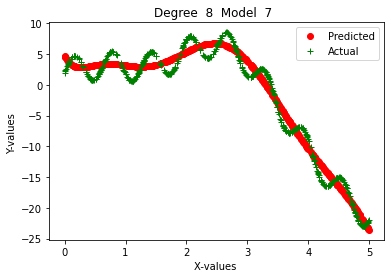

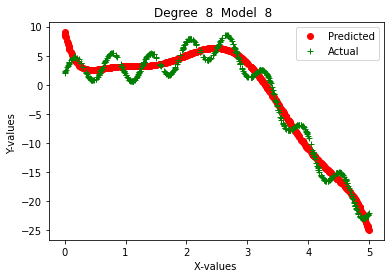

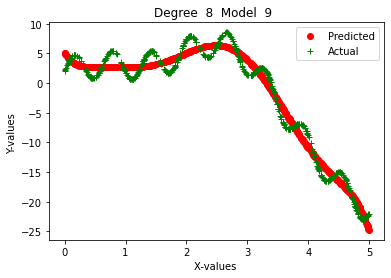

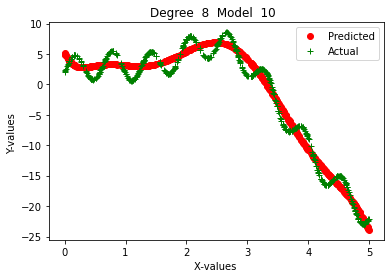

Avg_Bias Degree 8   = 2.5665001060159662
Avg_var Degree 8  = 0.05645075052697436
Avg_mse Degree 8   = 2.622950856542942


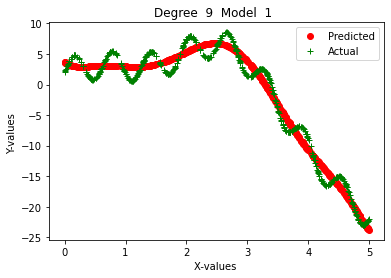

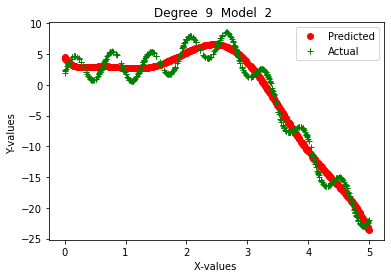

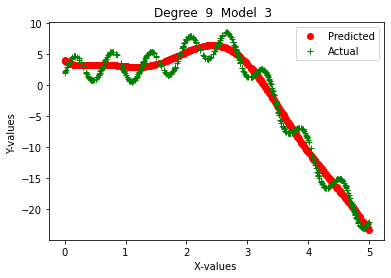

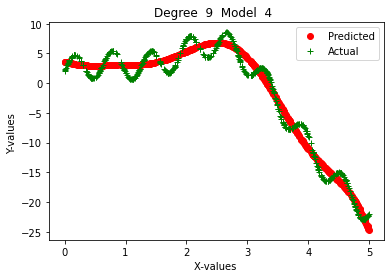

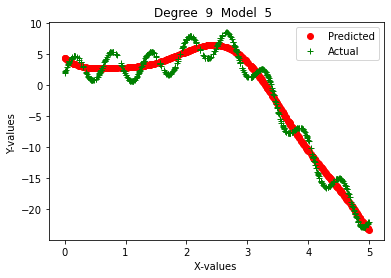

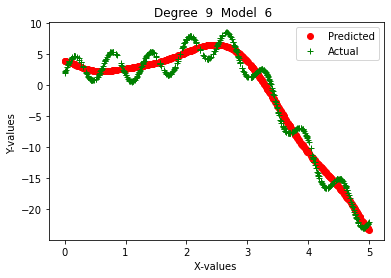

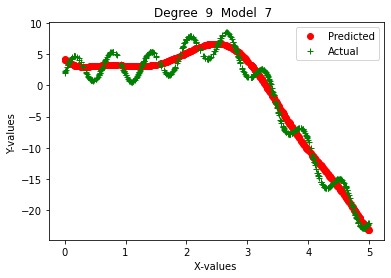

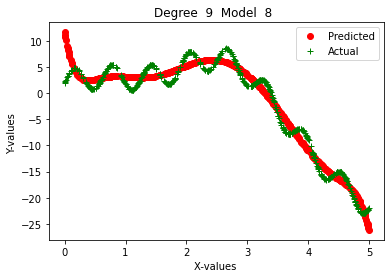

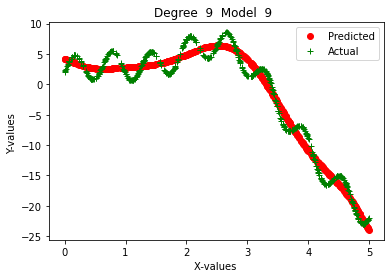

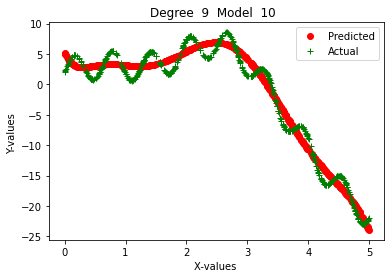

Avg_Bias Degree 9   = 2.6146137934092426
Avg_var Degree 9  = 0.06762718722305777
Avg_mse Degree 9   = 2.682240980632301


In [14]:
Avg_bias=list()
Avg_var=list()
Avg_mse=list()

for i in range(9):   #9 degree 
    Bias_Var_mse=Model_Degree(i+1)
    Avg_Bias=np.mean((Bias_Var_mse[0]))
    Avg_Var=np.mean((Bias_Var_mse[1]))
    Avg_Mse=np.mean((Bias_Var_mse[2]))
    print('Avg_Bias Degree {}   ='.format(i+1),(Avg_Bias))  #avg Bias degree n for 10 models
    print('Avg_var Degree {}  ='.format(i+1),(Avg_Var))   #avg Var degree n for 10 models
    print('Avg_mse Degree {}   ='.format(i+1),(Avg_Mse))   #avg MSE degree n for 10 models    
    Avg_bias.append(Avg_Bias)
    Avg_var.append(Avg_Var)
    Avg_mse.append(Avg_Mse)
    

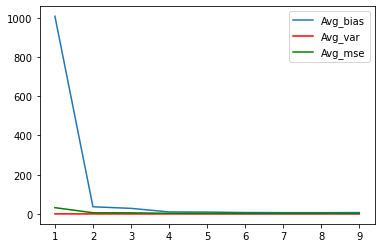

In [27]:
Avg_bias,Avg_var,Avg_mse;
Complexity=np.arange(1,10)
plt.plot(Complexity,np.square(Avg_bias),label='Avg_bias')
plt.plot(Complexity,Avg_var,'r',label='Avg_var')
plt.plot(Complexity,Avg_mse,'g',label='Avg_mse')
plt.legend()



In [16]:
Avg_bias,Avg_var,Avg_mse

([31.751675866625327,
  6.034738793871623,
  5.322868899944348,
  3.181483224235673,
  3.078721954241316,
  2.6612519007946553,
  2.5658239651482537,
  2.5665001060159662,
  2.6146137934092426],
 [0.14866990809401534,
  0.041014755934911606,
  0.0488066332963188,
  0.03283505933792262,
  0.04099843804470085,
  0.038908396209798586,
  0.048544237405899526,
  0.05645075052697436,
  0.06762718722305777],
 [31.900345774719348,
  6.075753549806534,
  5.371675533240667,
  3.2143182835735957,
  3.119720392286017,
  2.7001602970044543,
  2.6143682025541537,
  2.622950856542942,
  2.682240980632301])

# Task 2

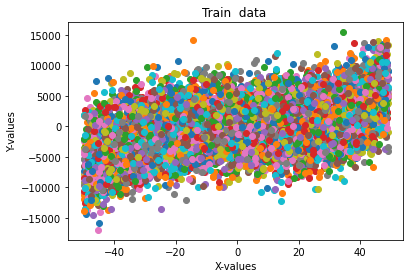

In [17]:
#import X,y Train   # 20 * 400

data_T2_xtrn=pd.read_pickle('X_train.pkl')  # 20 model * 400 element

data_T2_ytrn=pd.read_pickle('Y_train.pkl')  # 20 model * 400 element 

#plot Training data
colors_trn = np.random.rand(400)
plt.plot(data_T2_xtrn,data_T2_ytrn,'o' );

plt.title("Train  data ")
plt.xlabel("X-values")
plt.ylabel("Y-values")
plt.show()

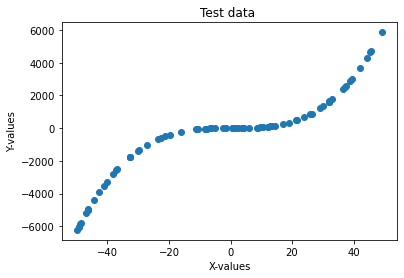

In [18]:
#import X,y Test   # 80 * 1
data_T2_xtst=pd.read_pickle('X_test.pkl')
data_T2_xtst = pd.DataFrame(data_T2_xtst,columns = ['X_Test'])

data_T2_ytst=pd.read_pickle('Fx_test.pkl')
data_T2_ytst = pd.DataFrame(data_T2_ytst,columns = ['Y_test'])
 

 #plot testing data
colors_tst = np.random.rand(len(data_T2_xtst))
plt.plot(data_T2_xtst['X_Test'],data_T2_ytst['Y_test'],'o');
plt.title("Test data ")
plt.xlabel("X-values")
plt.ylabel("Y-values")
plt.show()

In [19]:
data_T2_ytst=data_T2_ytst.to_numpy()
data_T2_xtst=data_T2_xtst.to_numpy()


In [20]:
def Model_Degree_task2(Degree):
    poly=PolynomialFeatures(degree=Degree)
    Y_test_pred=list()   # Predicting 10 models using 10 model 
    #Bias_Var_Mse=list()      
    # we iterate 10 models for specified degree 
    Model=list()
    bias_=list()
    var_=list()
    mse_=list()
    for j in range (20):
        #loop 2
        Model.append(LinearRegression().fit((poly.fit_transform(data_T2_xtrn[j].reshape(-1,1))),data_T2_ytrn[j]))
        Y_test_pred.append(Model[j].predict(poly.fit_transform(data_T2_xtst.reshape(-1,1))))
        # get bias and variance
        mse, bias, var = bias_variance_decomp(Model[j],poly.fit_transform(data_T2_xtrn[j].reshape(-1,1)),
                                              data_T2_ytrn[j], poly.fit_transform(data_T2_xtst.reshape(-1,1)),
                                              data_T2_ytst.reshape(-1,1), loss='mse',
                                              num_rounds=200, random_seed=123)
        bias_.append(bias)
        var_.append(var)
        mse_.append(mse)

        
    
    
    for i in range(1,20):
        plt.plot(data_T2_xtst, Y_test_pred[i-1] ,'o',color='r',label='Predicted')
        plt.plot(data_T2_xtst, data_T2_ytst ,'+',color='g',label='Actual')
        plt.title( 'Degree  %d ' % Degree + ' Model  %d  ' % i)
        plt.xlabel('X-values ')
        plt.ylabel('Y-values ')
        plt.legend()
        plt.show()
    return(bias_,var_,mse_)

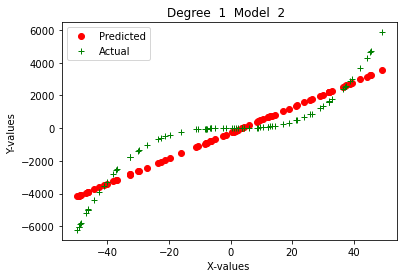

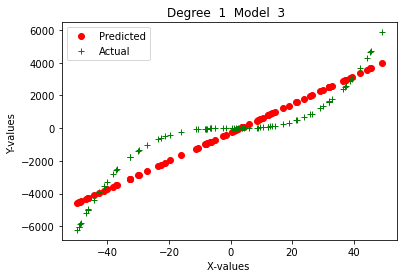

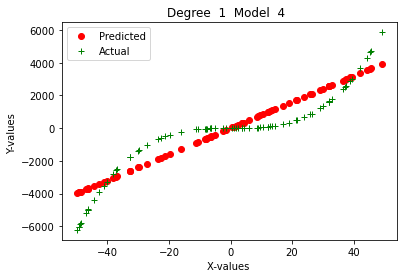

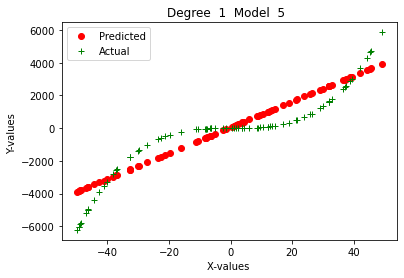

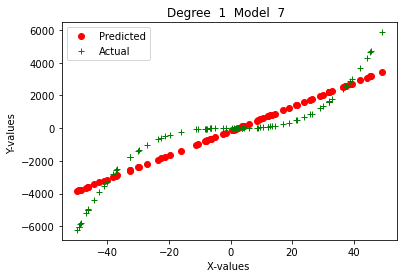

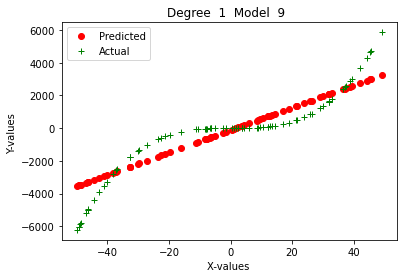

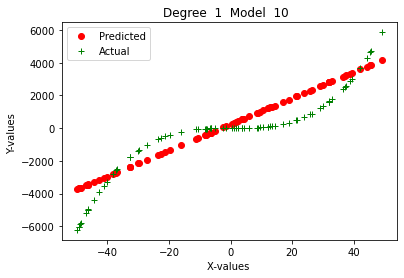

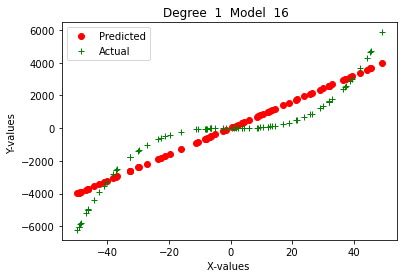

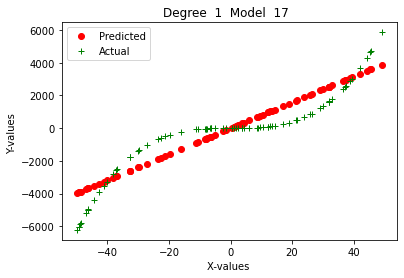

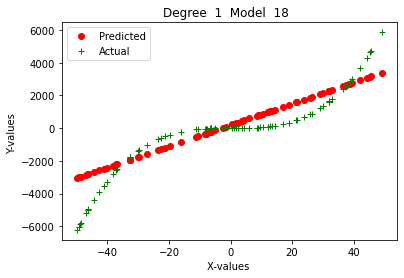

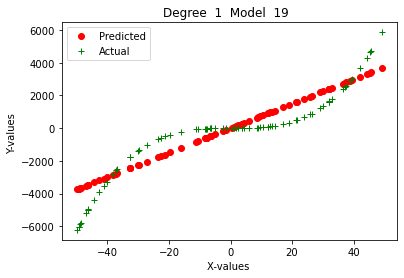

Avg_Bias Degree 1   = 921656835.9753215
Avg_var Degree 1  = 73416.15180041666
Avg_mse Degree 1   = 11594126.601491936


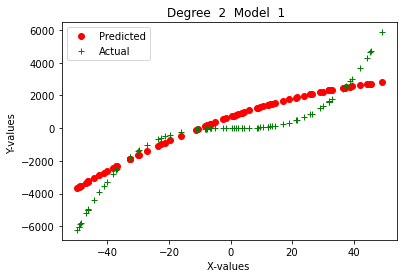

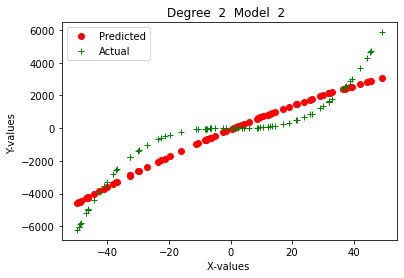

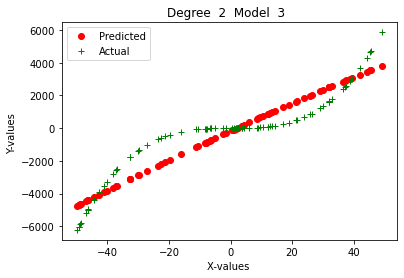

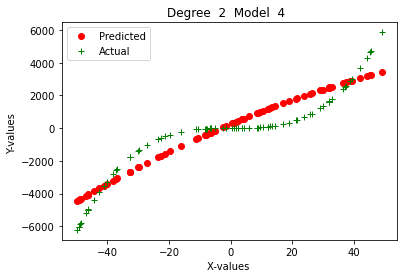

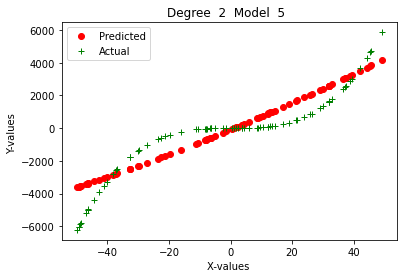

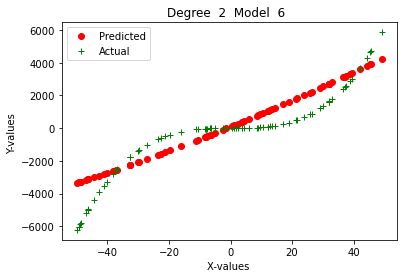

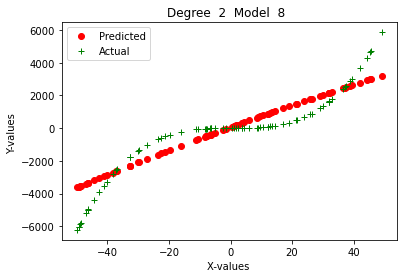

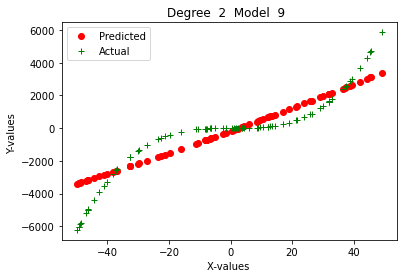

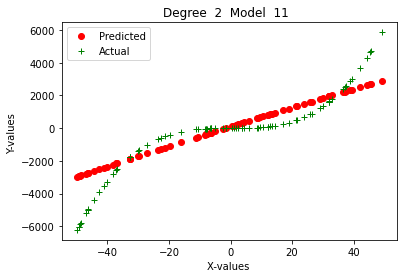

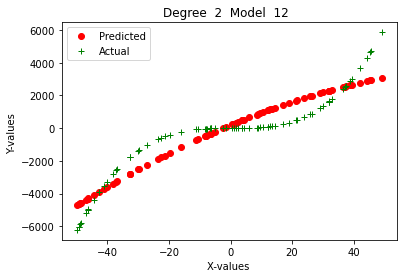

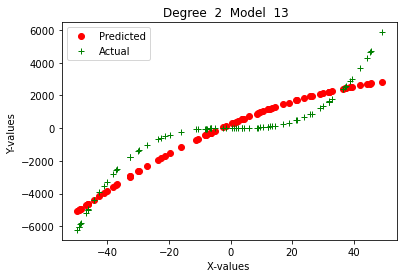

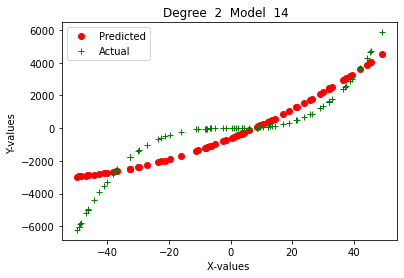

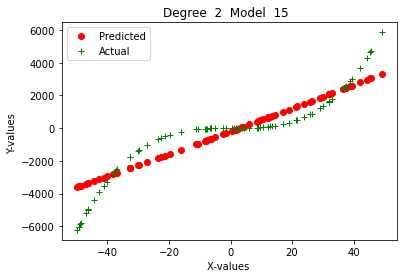

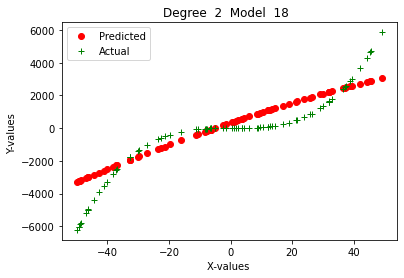

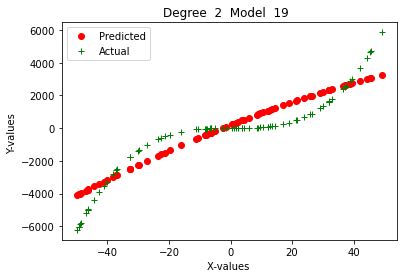

Avg_Bias Degree 2   = 931510573.7927631
Avg_var Degree 2  = 121586.32841038969
Avg_mse Degree 2   = 11765468.500819929


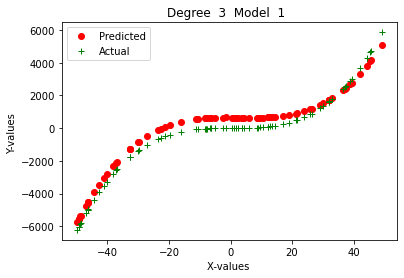

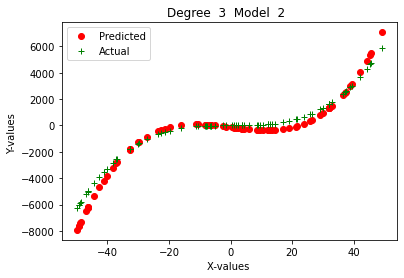

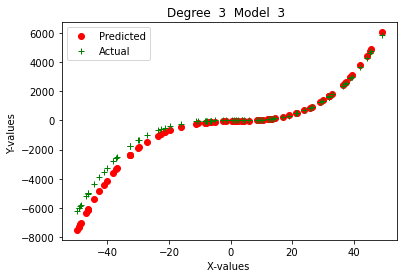

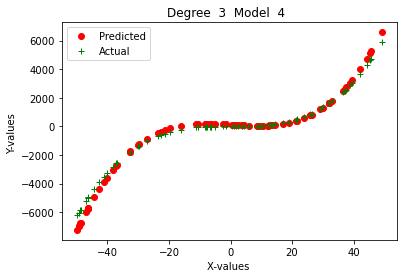

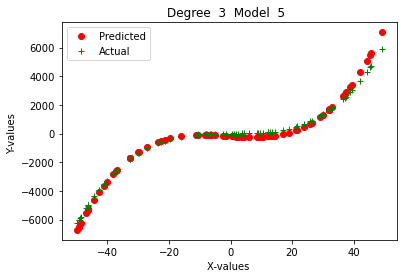

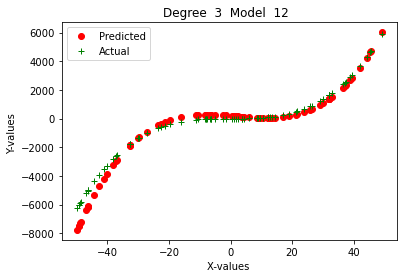

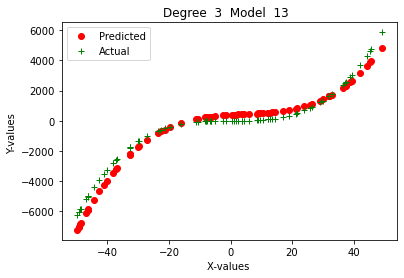

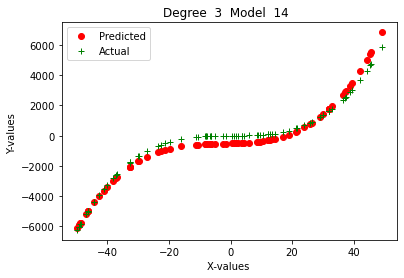

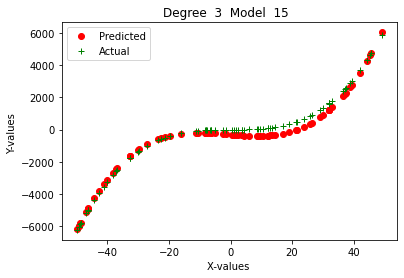

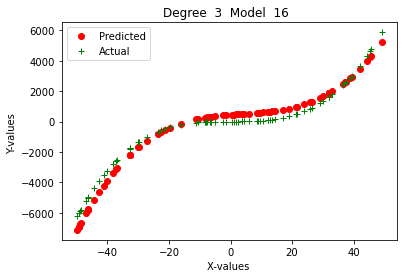

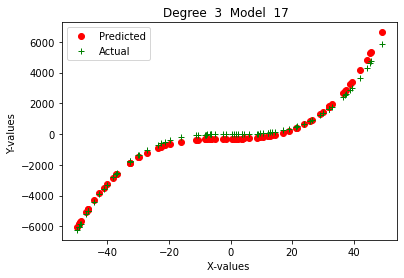

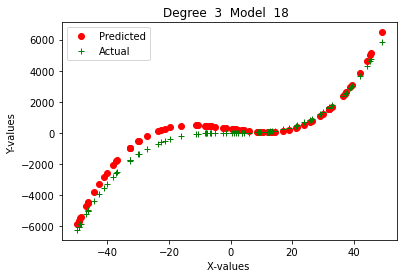

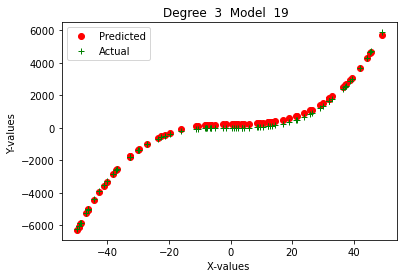

Avg_Bias Degree 3   = 1098625292.8126748
Avg_var Degree 3  = 148540.68949941322
Avg_mse Degree 3   = 13881356.849657845


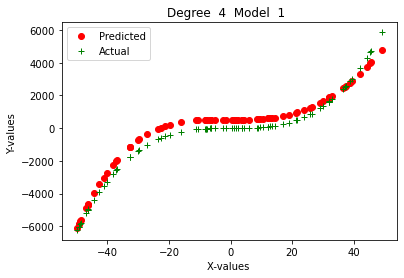

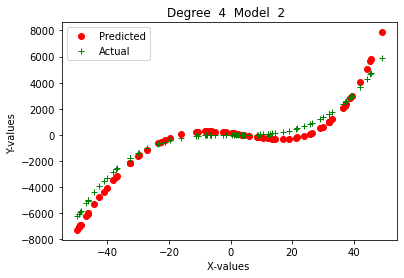

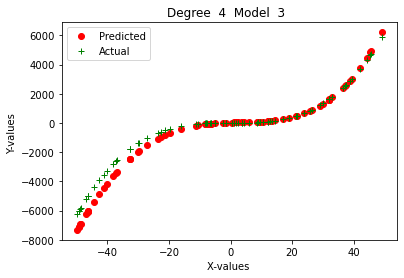

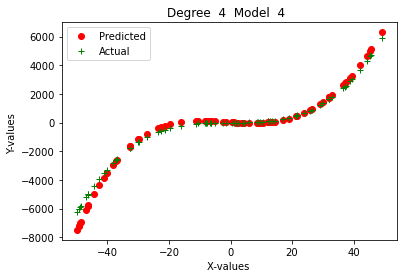

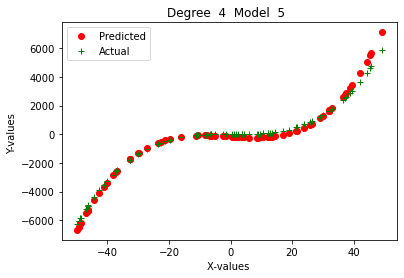

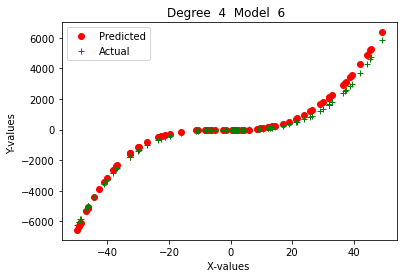

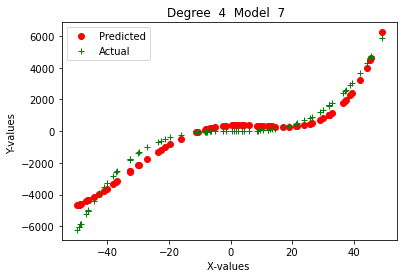

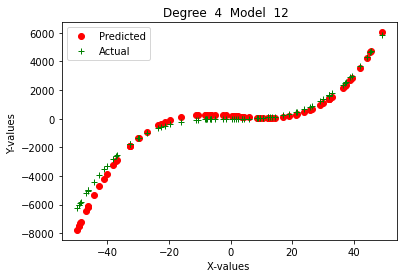

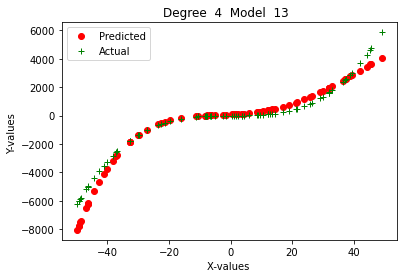

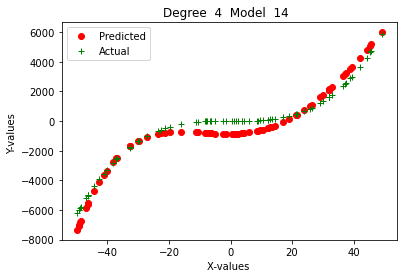

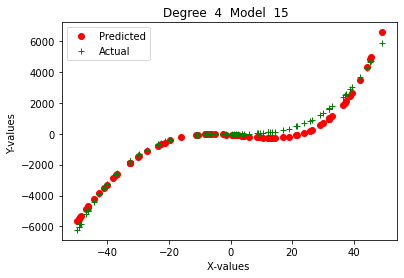

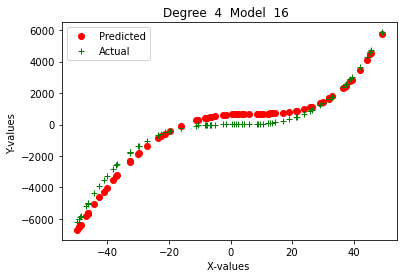

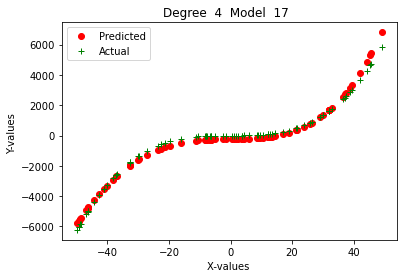

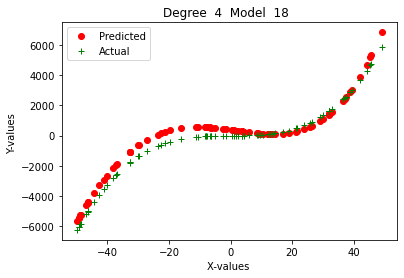

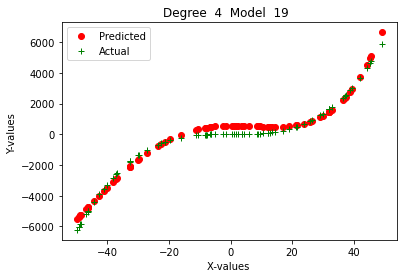

Avg_Bias Degree 4   = 1104236756.5193548
Avg_var Degree 4  = 197414.71854647138
Avg_mse Degree 4   = 14000374.175038407


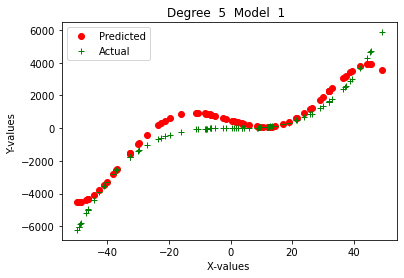

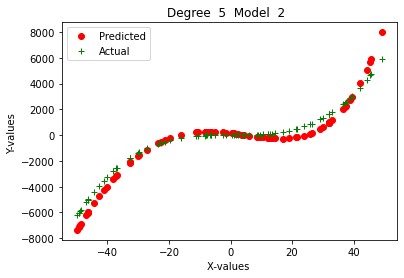

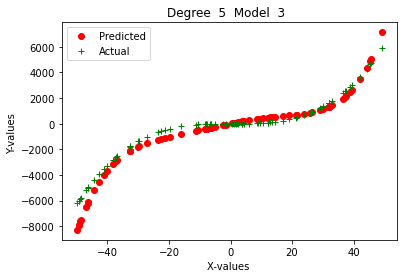

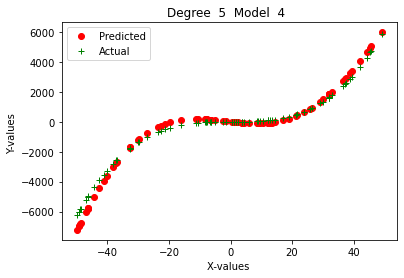

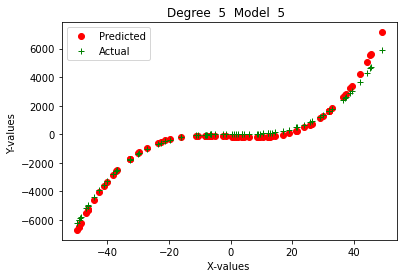

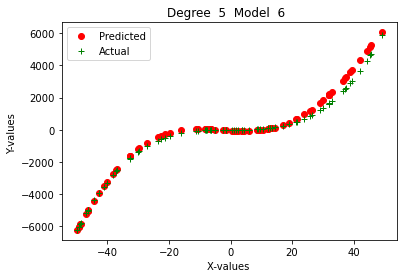

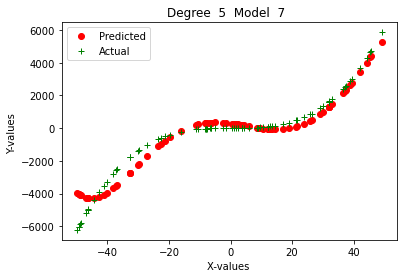

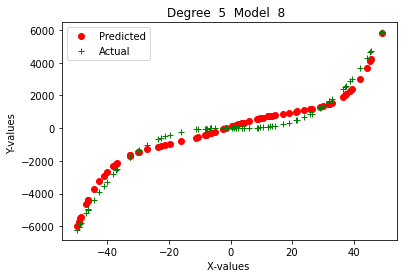

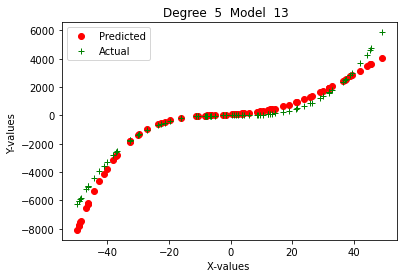

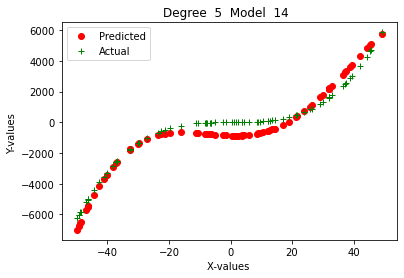

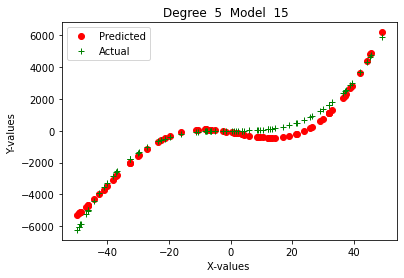

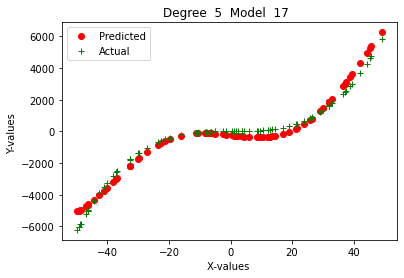

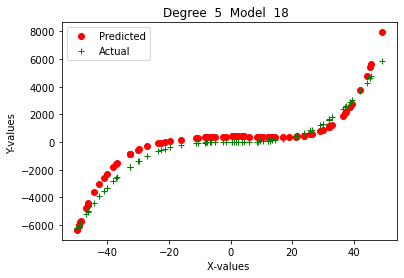

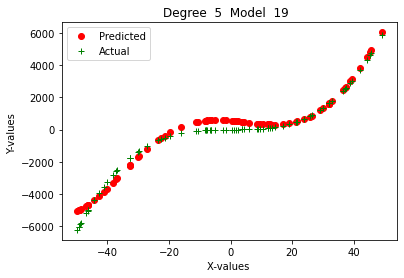

Avg_Bias Degree 5   = 1107652823.7156606
Avg_var Degree 5  = 242468.45355755152
Avg_mse Degree 5   = 14088128.750003312


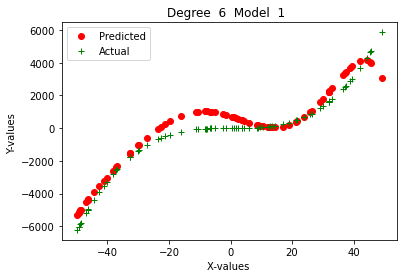

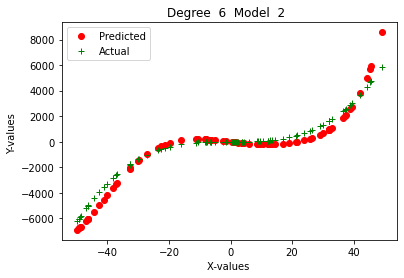

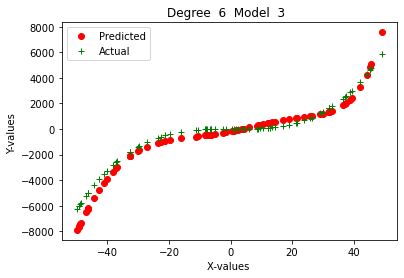

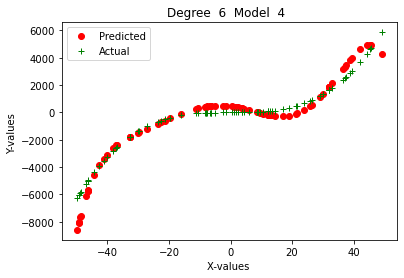

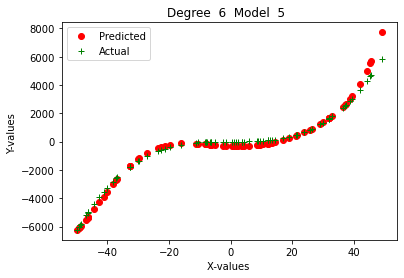

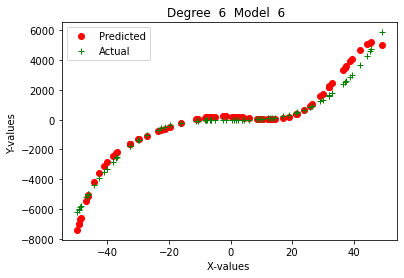

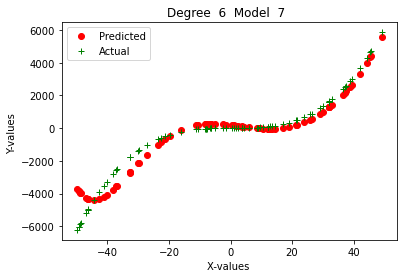

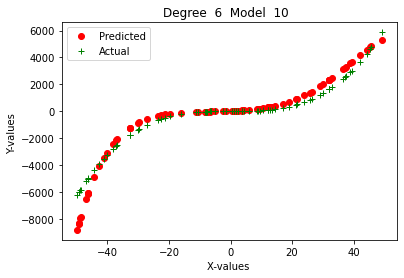

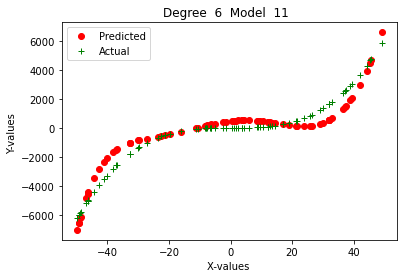

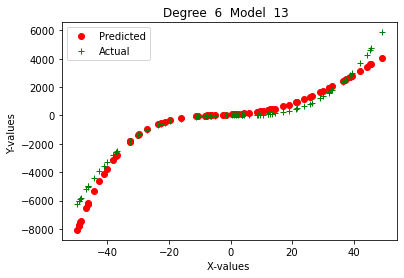

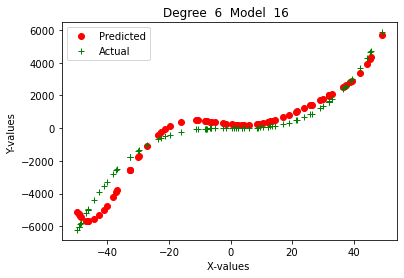

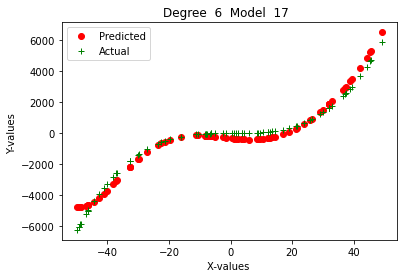

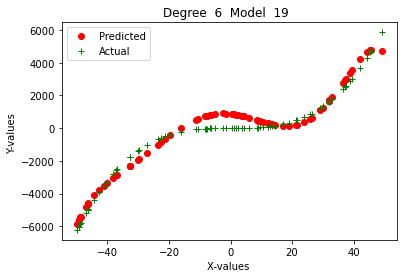

Avg_Bias Degree 6   = 1113449362.0527148
Avg_var Degree 6  = 290435.47326134716
Avg_mse Degree 6   = 14208552.49892028


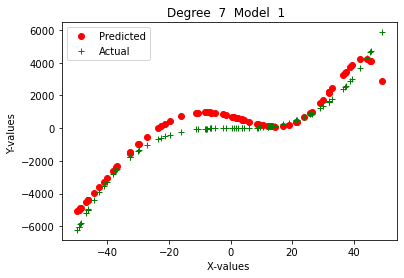

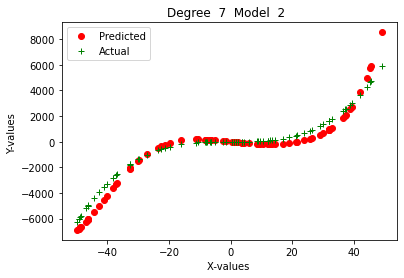

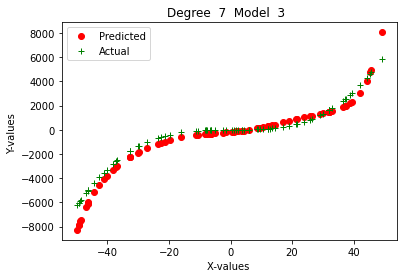

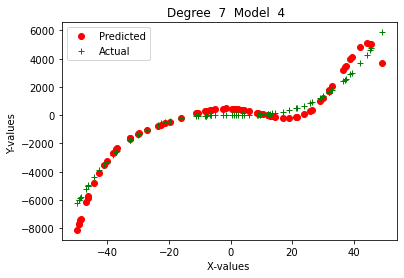

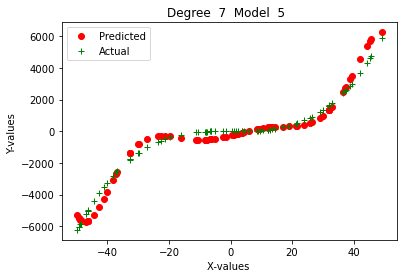

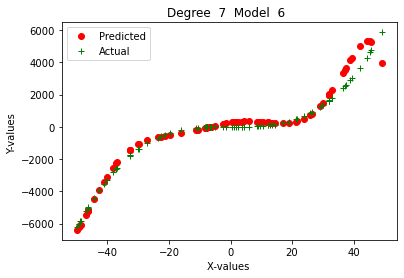

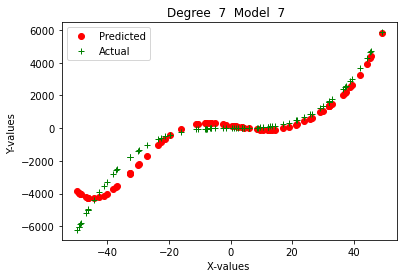

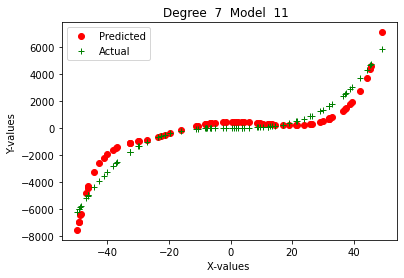

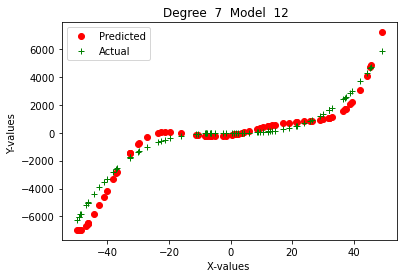

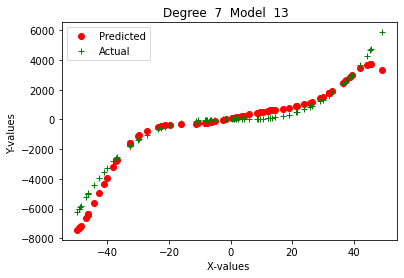

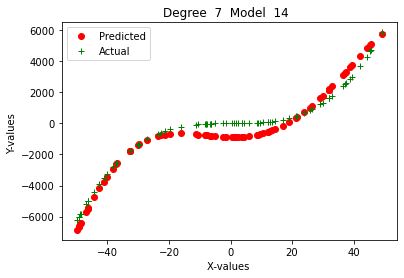

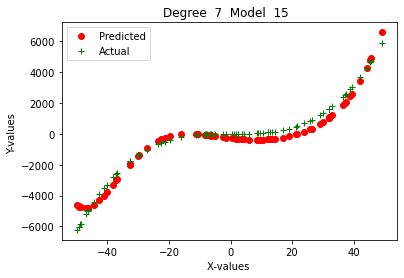

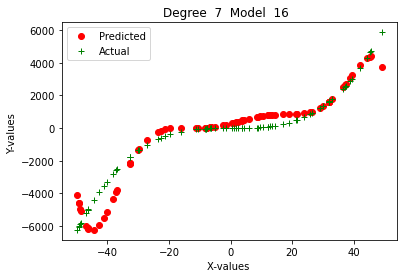

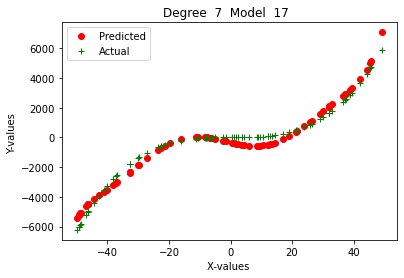

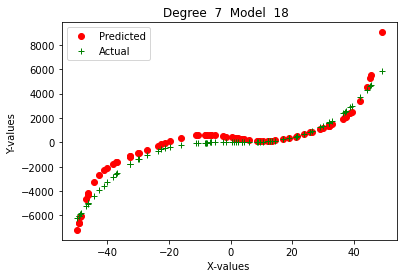

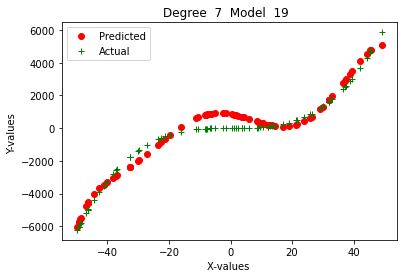

Avg_Bias Degree 7   = 1110880561.488425
Avg_var Degree 7  = 335598.72327596135
Avg_mse Degree 7   = 14221605.741881276


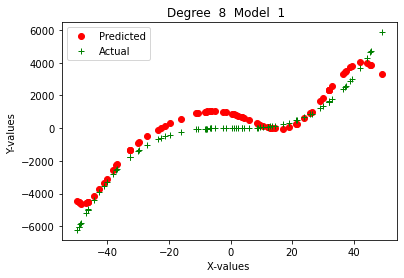

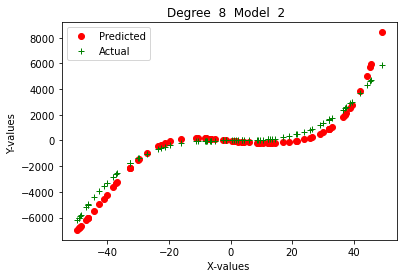

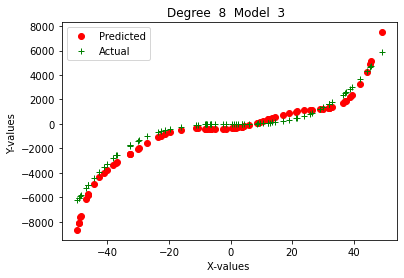

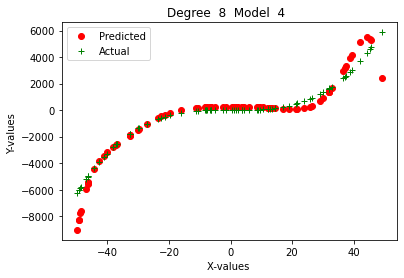

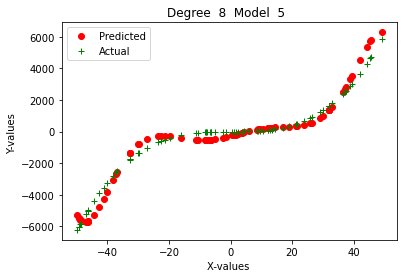

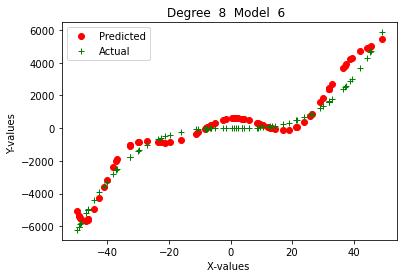

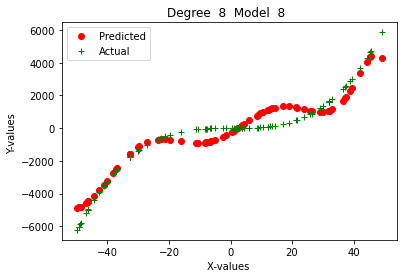

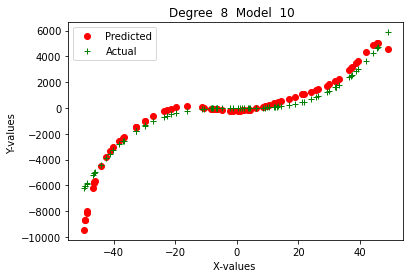

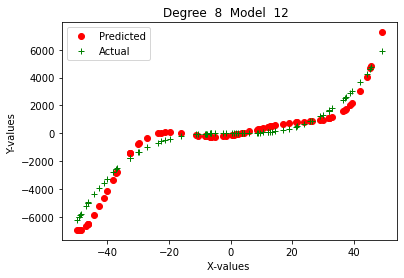

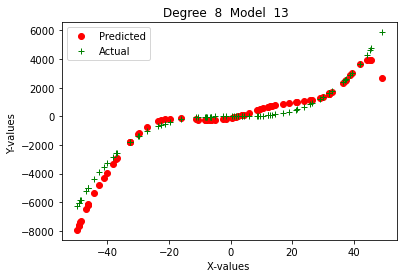

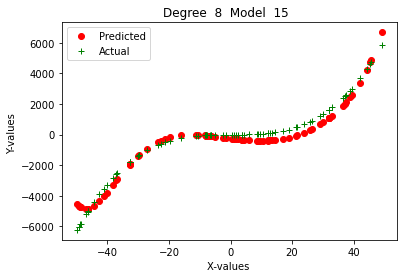

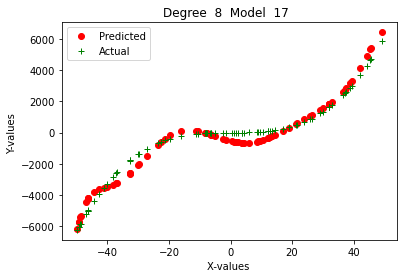

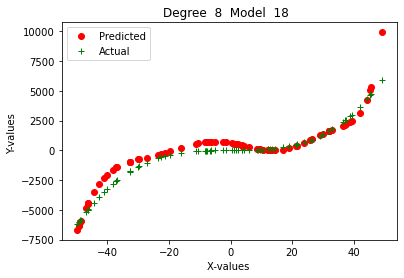

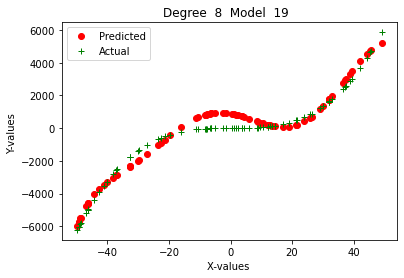

Avg_Bias Degree 8   = 1114561899.0821908
Avg_var Degree 8  = 385481.82362030714
Avg_mse Degree 8   = 14317505.562147696


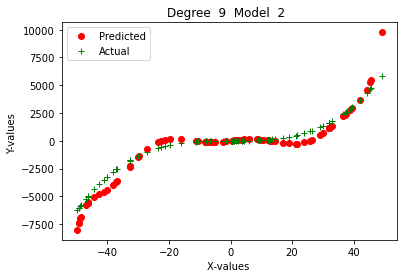

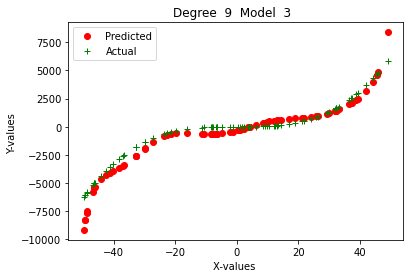

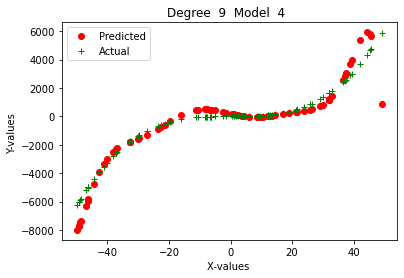

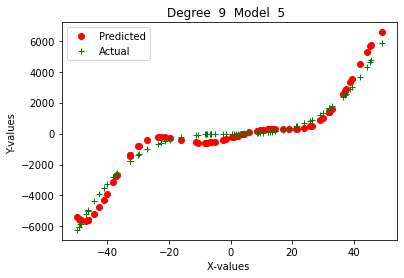

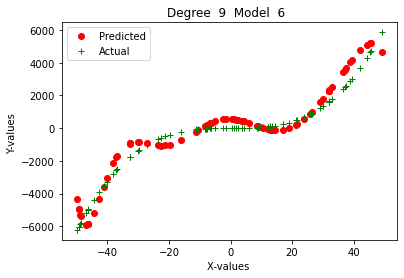

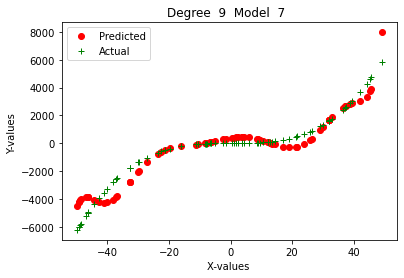

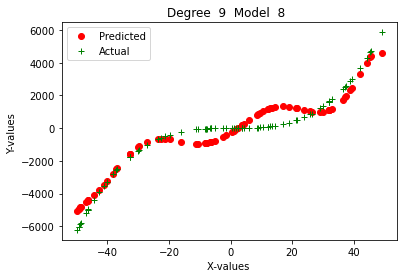

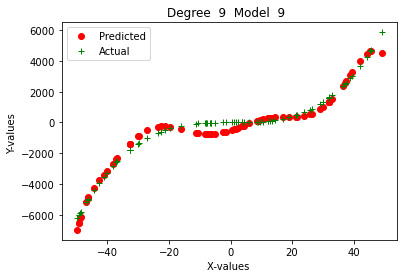

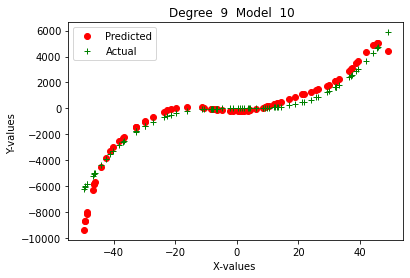

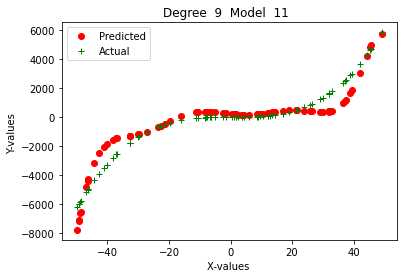

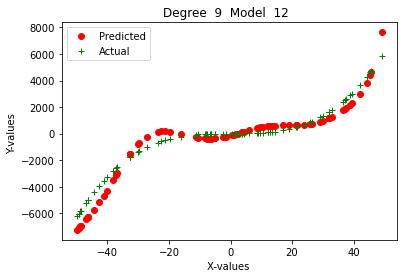

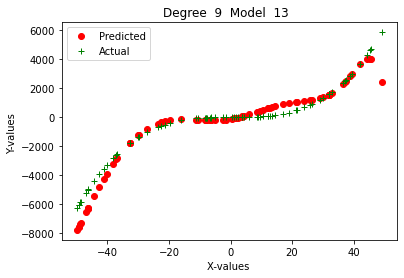

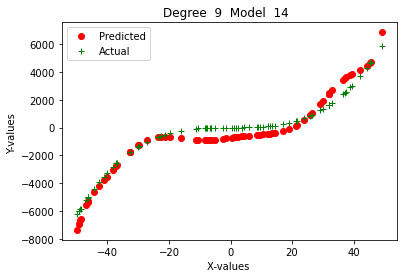

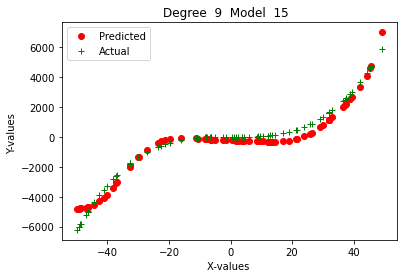

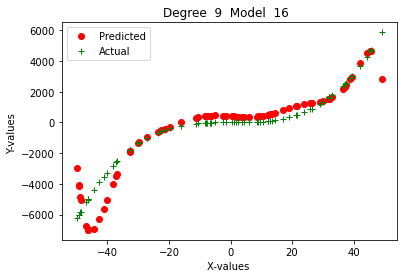

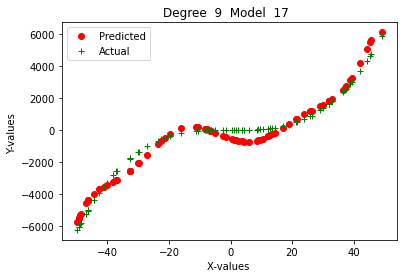

Avg_Bias Degree 9   = 1117934103.4136217
Avg_var Degree 9  = 450362.5353038901
Avg_mse Degree 9   = 14424538.827974161


In [21]:
Avg_bias2=list()
Avg_var2=list()
Avg_mse2=list()

for i in range(9):   #9 degree 
    Bias_Var_Mse2=Model_Degree_task2(i+1)
    Avg_Bias2=np.mean((Bias_Var_Mse2[0]))
    Avg_Var2=np.mean((Bias_Var_Mse2[1]))
    Avg_Mse2=np.mean((Bias_Var_Mse2[2]))
    print('Avg_Bias Degree {}   ='.format(i+1),(Avg_Bias2))  #avg Bias degree n for 10 models
    print('Avg_var Degree {}  ='.format(i+1),(Avg_Var2))   #avg Var degree n for 10 models
    print('Avg_mse Degree {}   ='.format(i+1),(Avg_Mse2))   #avg MSE degree n for 10 models    
    Avg_bias2.append(Avg_Bias2)
    Avg_var2.append(Avg_Var2)
    Avg_mse2.append(Avg_Mse2)

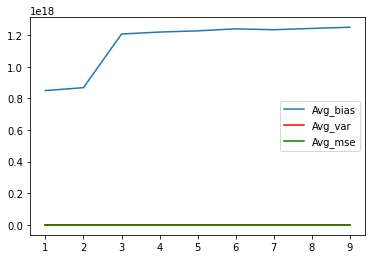

In [25]:
Avg_bias2,Avg_var2,Avg_mse2;
Complexity=np.arange(1,10)
plt.plot(Complexity,np.square(Avg_bias2),label='Avg_bias')
plt.plot(Complexity,Avg_var2,'r',label='Avg_var')
plt.plot(Complexity,Avg_mse2,'g',label='Avg_mse')
plt.legend()

In [23]:
Avg_bias2,Avg_var2,Avg_mse2


([921656835.9753215,
  931510573.7927631,
  1098625292.8126748,
  1104236756.5193548,
  1107652823.7156606,
  1113449362.0527148,
  1110880561.488425,
  1114561899.0821908,
  1117934103.4136217],
 [73416.15180041666,
  121586.32841038969,
  148540.68949941322,
  197414.71854647138,
  242468.45355755152,
  290435.47326134716,
  335598.72327596135,
  385481.82362030714,
  450362.5353038901],
 [11594126.601491936,
  11765468.500819929,
  13881356.849657845,
  14000374.175038407,
  14088128.750003312,
  14208552.49892028,
  14221605.741881276,
  14317505.562147696,
  14424538.827974161])